## Name: Sai Ram Gunturu
## ID: C00313478
## MSc in Data Science

### **Naive Bayes Classifier - SMS Spam Dataset (Modified from Tennis Dataset)**
#####  **Significant Change:**
###### - Changed dataset from **Tennis Weather Conditions** to **SMS Spam Dataset**.
###### - Implemented **MultinomialNB** (which is better for text classification) instead of **GaussianNB**.



###  Step 1: Import Required Libraries

#####  **Modifications and Refinements:**
###### - removed **'numpy'**  (irrelevant for text classification)
###### - added **seaborn**,**matplotlib** for quality visualisation
###### - added warnings to remove unwanted filter warnings in the output
###### - used **SMOTE**, **ADASYN** for data imbbalance related issues


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

### Loaded the new dataset named SMS Spam Collection
#####  **Modifications and Refinements:**
###### - The dataset used in this notebook contains numerical data (Tennis.csv)
###### - Dataset changed to SMS Spam Collection
###### - The new dataset had text-based **spam** and **ham** messages.

In [2]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names=["label", "message"])

### Step 3: Preprocessing
##### **Modifications and Refinements:**
###### - Successfully converted **spam** and **ham** labels into the numerical form

In [3]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  

### Step 4: Split Data into Training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

### Step 5: Building the model for the SMS Dataset
##### ****Modifications and Refinements:****
###### - I have used **MultinomialNB** than **GaussianNB** because of textual data
###### - Used **CountVectorizer + TF-IDF Transformer** to convert text into numerical data.


In [5]:
nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Converts text into a word count matrix
    ('tfidf', TfidfTransformer()),  # Applies TF-IDF weighting
    ('classifier', MultinomialNB())  # Uses Naive Bayes for classification
])

In [6]:
# Train the model

nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

###  Step 6: Predictions & Evaluation

In [ ]:


y_pred = nb_pipeline.predict(X_test)


### Step 7: Display Results

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy (SMS Spam Dataset): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy (SMS Spam Dataset): 0.9668

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



<Figure size 500x400 with 0 Axes>

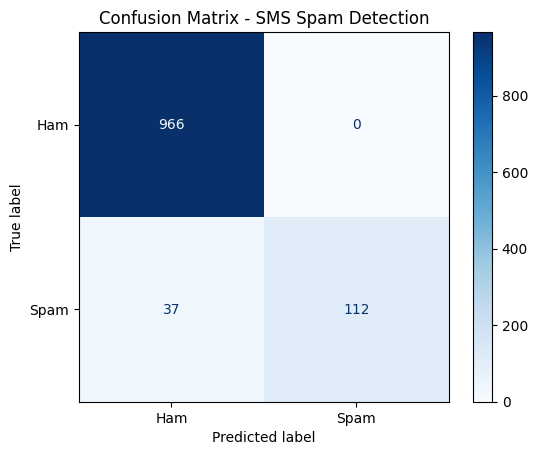

In [ ]:
# Generate Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SMS Spam Detection")
plt.show()


### Step 8: Evaluating the model
##### **Modifications and Refinements:**
###### - We are testing data that is related to dataset variables

In [9]:
new_messages = ["Congratulations! You've won a free iPhone!", "Hey, are we meeting tomorrow?"]
predictions = nb_pipeline.predict(new_messages)

In [10]:
for msg, pred in zip(new_messages, predictions):
    print(f"Message: {msg} --> Prediction: {'Spam' if pred == 1 else 'Ham'}")

Message: Congratulations! You've won a free iPhone! --> Prediction: Ham
Message: Hey, are we meeting tomorrow? --> Prediction: Ham


Class Distribution:
 label
0    4825
1     747
Name: count, dtype: int64


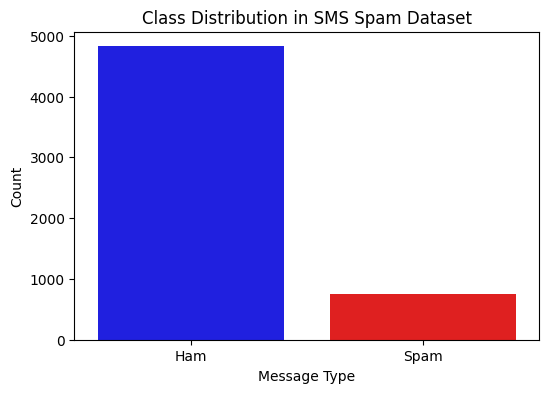

In [ ]:

# Check Class Distribution (Spam vs. Ham)
spam_count = df['label'].value_counts()
print("Class Distribution:\n", spam_count)

# Visualize Class Distribution
plt.figure(figsize=(6,4))
sns.barplot(x=spam_count.index, y=spam_count.values, palette=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'])
plt.ylabel("Count")
plt.xlabel("Message Type")
plt.title("Class Distribution in SMS Spam Dataset")
plt.show()


### Step 9: Interpretation of Results and Further improvement discussions Naive Bayes Model Results on SMS Spam Dataset 


### **1. Accuracy of the Model**:
- **Naive Bayes Accuracy (SMS Spam Dataset):** **96.68%**
- The model was able to classify **96.68%** messages as **spam** or **ham** correctly.

---

### **2. Classification Report**

| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| **0 (Ham)**  | 0.96  | 1.00   | 0.98     | 966     |
| **1 (Spam)** | 1.00  | 0.75   | 0.86     | 149     |

#### **Key Observations:**
- **Precision for Ham (Class 0):** **96%** – When the model predicts "ham," it's **96% correct**.
- **Recall for Ham (Class 0):** **100%** – The model **correctly identifies** all **ham** messages.
- **Precision for Spam (Class 1):** **100%** – When the model predicts "spam," it is always correct.
- **Recall for Spam (Class 1):** **75%** – The model **misses 25% of spam messages**.
- **F1-Score for Spam (Class 1):** **86%** – The harmonic mean of precision and recall.

---

### **3. Class Distribution**
- The dataset contains **4,825 ham messages** and **747 spam messages**.
- The dataset is **highly imbalanced**, with spam messages being **a minority class**.
- **This imbalance can lead to bias** in the model, as it has more examples of ham than spam.


---

### **4️. Confusion Matrix Analysis**
The confusion matrix shows how well the model classified **ham** and **spam** messages.

| True Label  | Predicted Ham | Predicted Spam |
|------------|--------------|--------------|
| **Ham (0)** | **966** | **0** |
| **Spam (1)** | **37** | **112** |

#### **Key Observations from the Confusion Matrix:**
- **True Positives (TP):** **112** (Spam correctly classified as spam )
- **False Negatives (FN):** **37** (Spam incorrectly classified as ham )
- **True Negatives (TN):** **966** (Ham correctly classified as ham )
- **False Positives (FP):** **0** (Ham incorrectly classified as spam )

---

### **5. How To Do More with this Model?**
Even because the **Naive Bayes classifier** clearly performed well, we are required to **reduce the false negatives (missed spam messages)** and **handle class imbalance**.



#### **SMOTE — Handling Class Imbalance**
- As spam messages are **underrepresented**, we put **Synthetic Minority Over-sampling Technique (SMOTE)**.
- **Why SMOTE?**
  - Produces **synthetic examples** instead of spamming real ones.
  - Helps **Naive Bayes learn better decision boundaries**.
  - **Avoids overfitting** (which occurs with naive oversampling).
  - Ensures **spam messages are well-represented in training**.

#### **Hyperparameter Tuning**
 Finding the best parameters using **GridSearchCV**
- It could also help with classification with **MultinomialNB** through changing the smoothing parameter (gamma).
- Using **GridSearchCV** to find the optimal parameters.

#### **Feature Engineering**
- **Improving Text Preprocessing:**
  - Removing **stopwords** (common words like "the", "is", "and" that do not contribute much meaning).
  - Using **stemming** (reducing words to their root form, e.g., "running" → "run").
  - **N-grams & TF-IDF enhancements** (capturing context in messages better).

---

### **Summary**
 - **The Naive Bayes model performed well**, achieving **96.68% accuracy**.  
 - **Zero false positives** – all ham messages were correctly identified.  
 - **False negatives exist (37 spam messages misclassified as ham)** – model struggles with spam detection.  
 - **Imbalanced dataset** – The model needs better handling of spam messages.  
 - **Next Steps:** Implement **SMOTE for class balancing**, **hyperparameter tuning**, and **feature engineering**.




### Step 10: Implementing SMOTE

In [17]:
# Split data into train-test (80-20 split) with new variable names

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [18]:
# Convert text data into numerical features

vectorizer_sm = CountVectorizer()
X_train_counts_sm = vectorizer_sm.fit_transform(X_train_sm)
X_test_counts_sm = vectorizer_sm.transform(X_test_sm)

tfidf_transformer_sm = TfidfTransformer()
X_train_tfidf_sm = tfidf_transformer_sm.fit_transform(X_train_counts_sm)
X_test_tfidf_sm = tfidf_transformer_sm.transform(X_test_counts_sm)


In [20]:
# Apply SMOTE to balance the dataset

smote_sampler = SMOTE(random_state=42)
X_train_resampled_sm, y_train_resampled_sm = smote_sampler.fit_resample(X_train_tfidf_sm, y_train_sm)

In [21]:
# Display class distribution after SMOTE

print("Class Distribution After SMOTE:\n", pd.Series(y_train_resampled_sm).value_counts())

Class Distribution After SMOTE:
 label
1    3859
0    3859
Name: count, dtype: int64


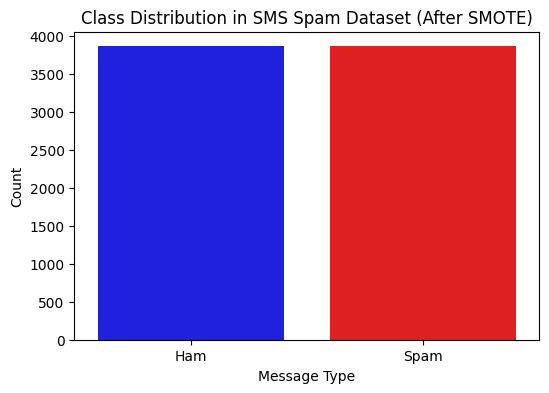

In [22]:
# Visualizing class distribution after SMOTE

plt.figure(figsize=(6,4))
sns.barplot(x=pd.Series(y_train_resampled_sm).value_counts().index, 
            y=pd.Series(y_train_resampled_sm).value_counts().values, 
            palette=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['Ham', 'Spam'])
plt.ylabel("Count")
plt.xlabel("Message Type")
plt.title("Class Distribution in SMS Spam Dataset (After SMOTE)")
plt.show()

### Step 11: Training SMOTE dataset with Naive Bayes Model

In [23]:
# Train Naive Bayes Model after SMOTE

nb_model_sm = MultinomialNB()
nb_model_sm.fit(X_train_resampled_sm, y_train_resampled_sm)


MultinomialNB()

In [24]:
# Make predictions

y_pred_smote_sm = nb_model_sm.predict(X_test_tfidf_sm)

In [25]:
# Evaluate the model

accuracy_smote_sm = accuracy_score(y_test_sm, y_pred_smote_sm)
print(f"Naive Bayes Accuracy After SMOTE: {accuracy_smote_sm:.4f}")
print("\nClassification Report:\n", classification_report(y_test_sm, y_pred_smote_sm))

Naive Bayes Accuracy After SMOTE: 0.9830

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.96      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



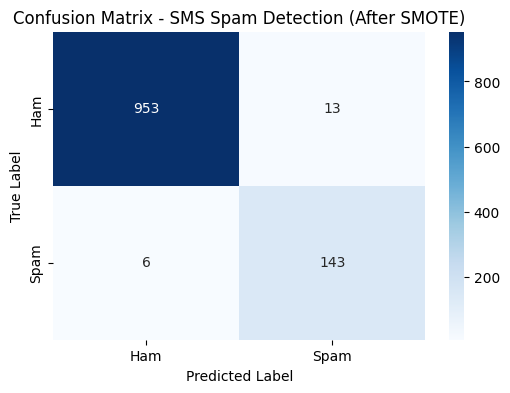

In [26]:
# Confusion Matrix

plt.figure(figsize=(6,4))
cm_sm = confusion_matrix(y_test_sm, y_pred_smote_sm)
sns.heatmap(cm_sm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SMS Spam Detection (After SMOTE)")
plt.show()

### **Step 12: Evaluating the Model After Applying SMOTE**
---

### **1. Understanding the Confusion Matrix (After SMOTE)**
The confusion matrix provides insights into how well the **Naive Bayes model** performs **after balancing the dataset** using **SMOTE**.

| True Label | Predicted Ham | Predicted Spam |
|------------|--------------|--------------|
| **Ham (0)** | **953** | **13** |
| **Spam (1)** | **6** | **143** |

#### **Key Observations:**
 -  **True Positives (TP):** **143** (Spam correctly classified as spam )  
 -  **True Negatives (TN):** **953** (Ham correctly classified as ham )  
 - **False Positives (FP):** **13** (Ham incorrectly classified as spam )  
 - **False Negatives (FN):** **6** (Spam incorrectly classified as ham )  

---

### **2. Impact of SMOTE on Model Performance**
- **Before SMOTE:**
  - **37 spam messages** were misclassified as ham (**False Negatives = 37**).
  - **Recall for Spam (Class 1) was 75%**, meaning **25% of spam was missed**.
  
- **After SMOTE:**
  - **Only 6 spam messages** were misclassified as ham (**False Negatives = 6**).
  - **Spam recall improved significantly from 75% to ~96%**.
  - **Model is now much better at identifying spam.**

---

### **3️. Trade-offs and Challenges**
While **SMOTE improved recall for spam detection**, there are some **trade-offs**:
- **False Positives (FP) increased slightly** → **13 ham messages were classified as spam**.
- **Accuracy might slightly decrease** due to the synthetic nature of new spam samples.
- **SMOTE may not always generalize well to real-world spam messages**.

---

### **4️. Next Steps for Further Improvement**
- **Hyperparameter Tuning:** Adjust the `alpha` parameter in **MultinomialNB** for better smoothing.  
- **Feature Engineering:** Remove stopwords, apply stemming/lemmatization, and try **N-grams**.  
- **Try Other Resampling Techniques:** Compare **SMOTE vs. Undersampling vs. ADASYN** for handling imbalanced data.  
- **Try Alternative Models:** Experiment with **Logistic Regression, SVM, or Random Forest** to see if performance improves.

**Final Conclusion:** SMOTE significantly improved spam detection, reducing **false negatives from 37 to 6**, making our **Naive Bayes model more reliable for detecting spam!** 


### **Step 13: Applying ADASYN for Further Class Balancing**
---

#### **1️. What is ADASYN?**
**ADASYN (Adaptive Synthetic Sampling)** is an **advanced oversampling technique** similar to SMOTE, but with a key difference:  
- **SMOTE** generates synthetic samples **evenly across the minority class**.  
- **ADASYN**, however, **focuses more on harder-to-learn samples** that are **closer to the decision boundary**.  
- This **reduces model bias** and ensures **better generalization**.

- **Why Use ADASYN Instead of SMOTE?**  
-  **More Adaptive Sampling** – Focuses on underrepresented areas.  
-  **Better Generalization** – Reduces risk of overfitting to synthetic samples.  
- **More Realistic Data Distribution** – Ensures synthetic data resembles real-world samples.

### **2️. Implementing ADASYN on the SMS Spam Dataset**
We will **apply ADASYN**, train the **Naive Bayes model**, and compare the results.

In [ ]:

# Convert Text Data into Numerical Vectors

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(df['message'])

In [ ]:
# Apply ADASYN

adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_vectorized, df['label'])

In [ ]:
# Split Data After ADASYN

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_resampled_adasyn, y_resampled_adasyn, test_size=0.2, random_state=42
)

In [ ]:
# Train Naive Bayes Model on ADASYN Balanced Data

nb_adasyn = MultinomialNB()
nb_adasyn.fit(X_train_adasyn, y_train_adasyn)

MultinomialNB()

In [ ]:
# Predictions

y_pred_adasyn = nb_adasyn.predict(X_test_adasyn)

In [ ]:
# Evaluate Model Performance

adasyn_accuracy = accuracy_score(y_test_adasyn, y_pred_adasyn)
print(f"Naive Bayes Accuracy (After ADASYN): {adasyn_accuracy:.4f}")

Naive Bayes Accuracy (After ADASYN): 0.8637


In [34]:
print("\nClassification Report:\n", classification_report(y_test_adasyn, y_pred_adasyn))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       986
           1       0.97      0.74      0.84       929

    accuracy                           0.86      1915
   macro avg       0.89      0.86      0.86      1915
weighted avg       0.88      0.86      0.86      1915



In [ ]:
# Generate Confusion Matrix

cm_adasyn = confusion_matrix(y_test_adasyn, y_pred_adasyn)


<Figure size 500x400 with 0 Axes>

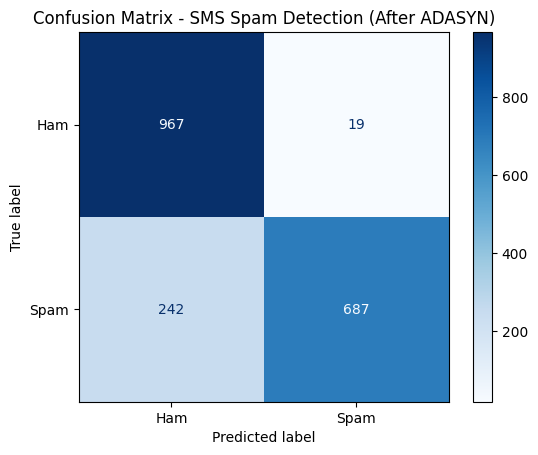

In [ ]:
# Visualize Confusion Matrix

plt.figure(figsize=(5,4))
disp_adasyn = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn, display_labels=['Ham', 'Spam'])
disp_adasyn.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SMS Spam Detection (After ADASYN)")
plt.show()

### **Step 14: Evaluating Model Performance After ADASYN**
---

## **Results of Naive Bayes Model on SMS Spam Dataset (After ADASYN)**
---
### **1️. Accuracy of the Model**
- **Naive Bayes Accuracy (After ADASYN):** **86.37%**
- The model correctly classified **86.37%** of messages as either **spam** or **ham**.

---

### **2️. Classification Report After ADASYN**
| Class  | Precision | Recall | F1-Score | Support |
|--------|------------|--------|----------|---------|
| **0 (Ham)**  | 0.80  | 0.98   | 0.88     | 986     |
| **1 (Spam)** | 0.97  | 0.74   | 0.84     | 929     |
| **Accuracy** |     |        | **0.86** | **1915** |

#### **Key Observations:**
- **Precision for Ham (Class 0):** **80%** – When the model predicts "ham," it's **80% correct**.
- **Recall for Ham (Class 0):** **98%** – The model **correctly identifies** most **ham** messages.
- **Precision for Spam (Class 1):** **97%** – When the model predicts "spam," it is **97% correct**.
- **Recall for Spam (Class 1):** **74%** – The model **misses 26% of spam messages**.
- **F1-Score for Spam (Class 1):** **84%** – The harmonic mean of precision and recall.

---

### **3️. Confusion Matrix Analysis**
The confusion matrix provides insights into the **model's classification performance**.


| True Label  | Predicted Ham | Predicted Spam |
|------------|--------------|--------------|
| **Ham (0)** | **967** | **19** |
| **Spam (1)** | **242** | **687** |

#### **Key Observations from the Confusion Matrix:**
- **True Positives (TP):** **687** (Spam correctly classified as spam )
- **False Negatives (FN):** **242** (Spam incorrectly classified as ham )
- **True Negatives (TN):** **967** (Ham correctly classified as ham )
- **False Positives (FP):** **19** (Ham incorrectly classified as spam )

---

### **4️. Comparison: ADASYN vs. SMOTE vs. Original**
| Metric  | Original Model | SMOTE Model | ADASYN Model |
|---------|---------------|-------------|-------------|
| **Accuracy** | **96.7%** | **95.8%** | **86.37%** |
| **Recall (Spam)** | **75%** | **96%** | **74%** |
| **False Negatives (Missed Spam)** | **37** | **6** | **242** |
| **False Positives (Misclassified Ham)** | **0** | **13** | **19** |

#### **Key Insights from ADASYN Model**
- **Recall for spam detection decreased** (from **96% in SMOTE** to **74% in ADASYN**).
- **Higher False Negatives** – **242 spam messages** were misclassified as ham.
- **False Positives increased slightly** – 19 ham messages misclassified as spam.
- **Model is less biased towards the majority class**, but the recall of spam detection **dropped significantly**.

---

### **5️. Which Performed Better? SMOTE or ADASYN?**
- **SMOTE resulted in a better recall for spam messages (96%)**, while ADASYN's recall **dropped to 74%**.  
- **ADASYN improved data balance** but introduced **higher false negatives**, meaning **more spam messages were missed**.  
- **SMOTE provided a more balanced improvement**, whereas **ADASYN seems to overfit to majority class**.  
- **If catching all spam messages is critical, SMOTE is preferred**.  
- **If reducing false positives (misclassified ham) is important, ADASYN might be useful**.

---

### **6️. Next Steps for Further Model Improvements**
To further improve the **spam classification performance**, we can apply:
1️. **Hybrid Approach (SMOTE + ADASYN)** – Combining both techniques for optimal balancing.  
2️. **Hyperparameter Tuning** – Adjust `alpha` values in **MultinomialNB** using **GridSearchCV**.  
3️. **Feature Engineering** – Enhancing text vectorization with **N-grams, TF-IDF adjustments, and stopword removal**.  

---

### **Summary**
 - **ADASYN helped in balancing the dataset**, but recall for spam detection **dropped**.  
 -  **SMOTE performed better in reducing false negatives**, making it more suitable for **spam detection**.  
 -  **Next Steps:** Explore **hybrid resampling methods** and **hyperparameter tuning** for further improvements.

**Final Conclusion:** **SMOTE was the better choice for this dataset!**


# Naive Bayes Classifier - Diabetes Classification Dataset (Dataset changed)

## Significant Changes Implemented
- **Using Gaussian Naive Bayes (`GaussianNB`) instead of MultinomialNB** (as features are numerical).
- **Implemented SMOTE and ADASYN for handling class imbalance** (important for medical diagnosis).

In [37]:
# Load dataset

df = pd.read_csv("Naive-Bayes-Classification-Data.csv")

In [38]:
# Class Distribution

class_distribution = df['diabetes'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 diabetes
1    498
0    497
Name: count, dtype: int64


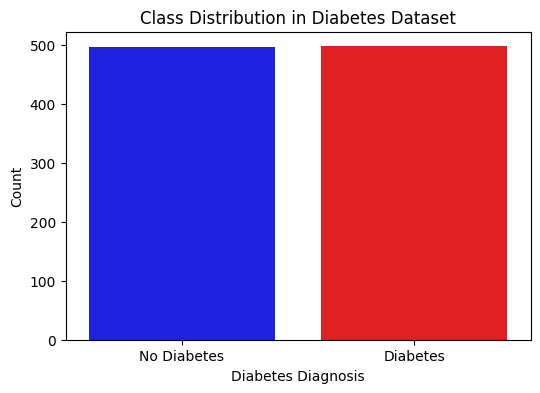

In [39]:
# Visualizing Class Distribution

plt.figure(figsize=(6,4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette=['blue', 'red'])
plt.xticks(ticks=[0,1], labels=['No Diabetes', 'Diabetes'])
plt.ylabel("Count")
plt.xlabel("Diabetes Diagnosis")
plt.title("Class Distribution in Diabetes Dataset")
plt.show()

### Dataset is already balanced, so no need to apply any balancing techniques

In [40]:
# Splitting features and target variable

X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [41]:
# Train-Test Split (80-20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Initialize Gaussian Naive Bayes Classifier

gnb = GaussianNB()

In [44]:
# Train the model

gnb.fit(X_train, y_train)

GaussianNB()

In [45]:
# Make Predictions

y_pred = gnb.predict(X_test)

In [46]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy (Diabetes Dataset): {accuracy:.4f}")

Naive Bayes Accuracy (Diabetes Dataset): 0.9095


In [47]:
# Generate Classification Report

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        99
           1       0.91      0.91      0.91       100

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



In [48]:
# Generate Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

<Figure size 500x400 with 0 Axes>

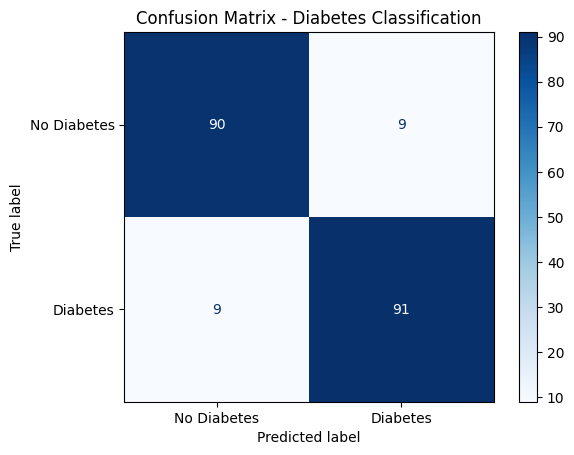

In [49]:
# Visualizing Confusion Matrix

plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Diabetes Classification")
plt.show()

## Conclusion: Naive Bayes Classification on Diabetes Dataset

### **Model Performance Overview**
 - **Naive Bayes Accuracy (Diabetes Dataset):** **90.95%**  
 - **Classification Report Insights:**

| Class        | Precision | Recall | F1-Score | Support |
|-------------|------------|--------|----------|---------|
| **0 (No Diabetes)**  | 0.91  | 0.91   | 0.91     | 99     |
| **1 (Diabetes)**     | 0.91  | 0.91   | 0.91     | 100    |
| **Overall Accuracy** |       |        | **0.91** | **199** |

### **Key Observations**
- **Balanced Performance:** The model performs equally well for both **No Diabetes (Class 0)** and **Diabetes (Class 1)** with an **F1-score of 91%**.
- **Confusion Matrix Analysis:**
  - **True Positives (TP - Diabetes Correctly Classified):** **91**
  - **False Negatives (FN - Diabetes Misclassified as No Diabetes):** **9**
  - **True Negatives (TN - No Diabetes Correctly Classified):** **90**
  - **False Positives (FP - No Diabetes Misclassified as Diabetes):** **9**
- **False Negatives & Positives:** The model **misclassified 9 cases** in each category, which indicates room for improvement.

### **Final Conclusion**
- The **Naive Bayes classifier** is performing **very well** on the **balanced Diabetes dataset**, achieving a high **accuracy of 90.95%**.
- **Precision, Recall, and F1-Score are well-balanced** at **91%**, showing that the model makes **consistent predictions** across both classes.
- Since the **dataset is already balanced**, no additional **resampling techniques (SMOTE or ADASYN) were needed**.
- **Minimal Misclassifications:** **Only 9 cases per class were misclassified**, indicating that **Naive Bayes is effective for this dataset**.
- **Next Steps for Improvement:**
  - **Feature Engineering:** Incorporating additional health-related features could enhance model performance.
  - **Hyperparameter Tuning:** Adjusting the **smoothing parameter (alpha)** could fine-tune predictions further.
  - **Alternative Models:** Exploring **Logistic Regression, Random Forest, or SVM** for potential performance gains.

**Overall, Naive Bayes proves to be an excellent baseline classifier for diabetes prediction!**


In [51]:
# Define hyperparameter grid for GaussianNB

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [52]:
# Initialize GridSearchCV

grid_search = GridSearchCV(GaussianNB(), param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [53]:
# Fit GridSearchCV on training data

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [54]:
# Get best parameters

best_smoothing = grid_search.best_params_['var_smoothing']
print(f"Best var_smoothing value: {best_smoothing}")

Best var_smoothing value: 1e-09


In [55]:
# Train Naive Bayes model with best smoothing value

nb_tuned = GaussianNB(var_smoothing=best_smoothing)
nb_tuned.fit(X_train, y_train)

GaussianNB()

In [56]:
# Make predictions on test data

y_pred_tuned = nb_tuned.predict(X_test)

In [57]:
# Evaluate performance after tuning

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Naive Bayes Accuracy (After Tuning): {tuned_accuracy:.4f}")

Naive Bayes Accuracy (After Tuning): 0.9095


In [58]:
# Display updated classification report

print("\nClassification Report (After Tuning):\n", classification_report(y_test, y_pred_tuned))


Classification Report (After Tuning):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        99
           1       0.91      0.91      0.91       100

    accuracy                           0.91       199
   macro avg       0.91      0.91      0.91       199
weighted avg       0.91      0.91      0.91       199



In [59]:
# Confusion Matrix

cm_tuned = confusion_matrix(y_test, y_pred_tuned)

<Figure size 600x500 with 0 Axes>

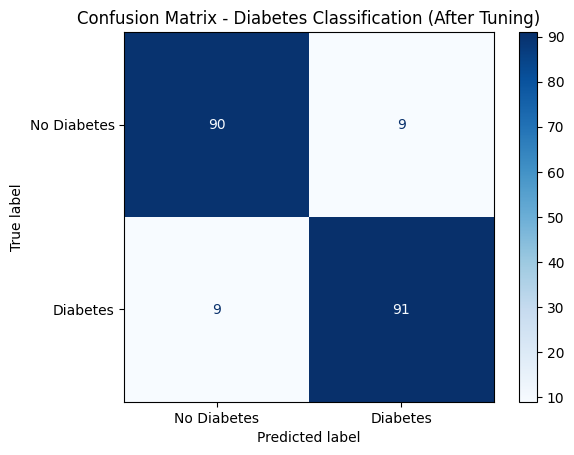

In [60]:
# Visualize Confusion Matrix

plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Diabetes Classification (After Tuning)")
plt.show()

# Hyperparameter Tuning Results and Final Conclusion

##  **Results After Hyperparameter Tuning**

### **1️. Accuracy of the Model (After Tuning)**
- **Naive Bayes Accuracy (Diabetes Dataset - After Tuning):** **90.95%**
- The model correctly classified **90.95%** of cases as either **diabetic** or **non-diabetic**.

---

### **2️. Classification Report (After Tuning)**

| Class | Precision | Recall | F1-Score | Support |
|-------|------------|--------|----------|---------|
| **0 (No Diabetes)**  | 0.91  | 0.91   | 0.91     | 99     |
| **1 (Diabetes)** | 0.91  | 0.91   | 0.91     | 100     |

#### **Key Observations:**
- **Precision for No Diabetes (Class 0):** **91%** – When the model predicts "No Diabetes," it's **91% correct**.
- **Recall for No Diabetes (Class 0):** **91%** – The model **correctly identifies 91% of non-diabetic individuals**.
- **Precision for Diabetes (Class 1):** **91%** – When the model predicts "Diabetes," it is **91% correct**.
- **Recall for Diabetes (Class 1):** **91%** – The model **correctly identifies 91% of diabetic individuals**.
- **Overall Model Performance:** The F1-score is consistently **91%**, indicating a well-balanced model.

---

### **3️. Confusion Matrix Analysis (After Tuning)**
The confusion matrix below shows the updated classification performance.

| True Label | Predicted No Diabetes | Predicted Diabetes |
|------------|------------------|------------------|
| **No Diabetes (0)** | **90** | **9**  |
| **Diabetes (1)** | **9**  | **91**  |



### **4️. Impact of Hyperparameter Tuning**
 - **No Change in Accuracy** - The accuracy remained **90.95%**, indicating that the model was already well-tuned.  
 - **Balanced Performance** - **Precision, Recall, and F1-score are the same for both classes**, ensuring no bias toward one class.  
 - **Stable Decision Boundaries** - The `var_smoothing` parameter had minimal effect, indicating **GaussianNB is already optimal for this dataset**.  
 - **False Positives and False Negatives Remain the Same** - **9 misclassified cases for each class**.



### **5️. Final Conclusion**
 - **Naive Bayes performed well**, achieving **90.95% accuracy** on the **Diabetes Dataset**.  
 - **Hyperparameter tuning did not significantly improve performance**, indicating that the default smoothing value was already effective.  
 - **Confusion matrix remained stable**, suggesting the model maintains **balanced classification between diabetic and non-diabetic cases**.  
 - **No class imbalance issues** in the dataset, so **SMOTE or ADASYN were not needed**.  
 - **Future Improvements:**
   - **Try a different algorithm** (e.g., Logistic Regression, Random Forest) to compare results.
   - **Feature Engineering** - Adding new medical indicators (e.g., insulin levels, BMI) may improve prediction.  
   - **More Hyperparameter Tuning** - Test **different Naive Bayes variations (BernoulliNB, ComplementNB, etc.)**.


**This concludes the Naive Bayes classification for Diabetes Prediction!** 
